Comparing AR, MA, and ARMA processes...


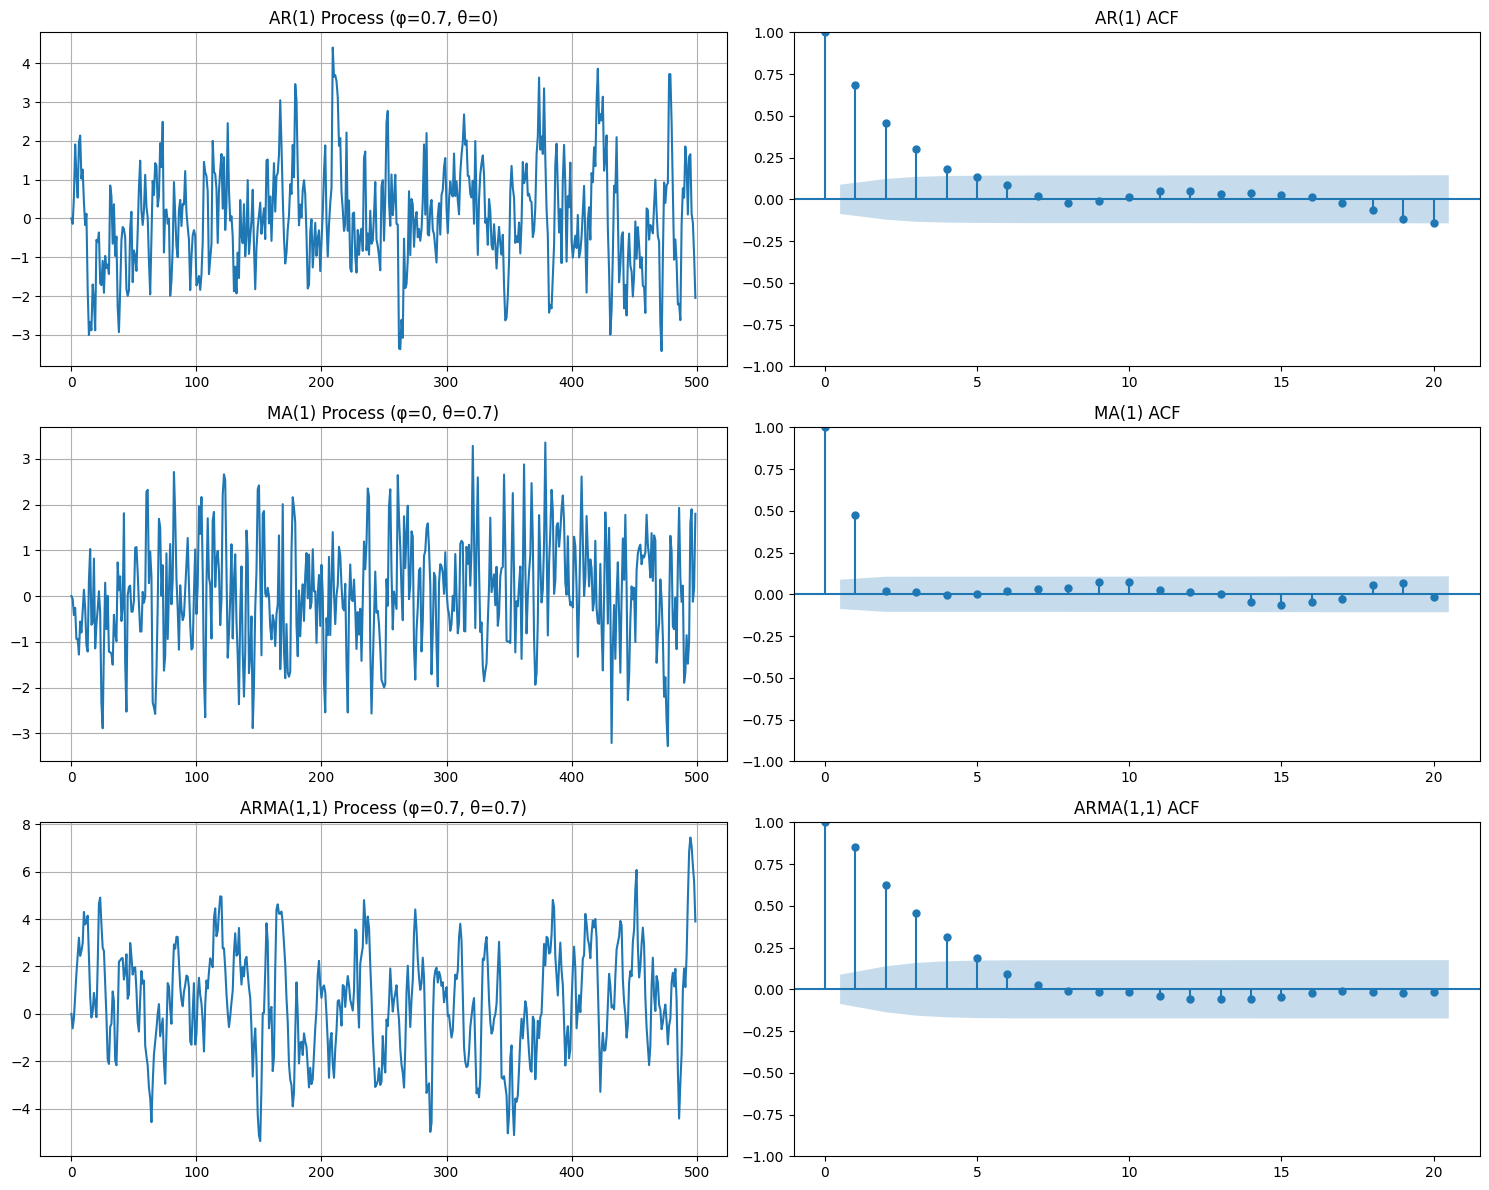


Analyzing different ARMA parameter combinations...


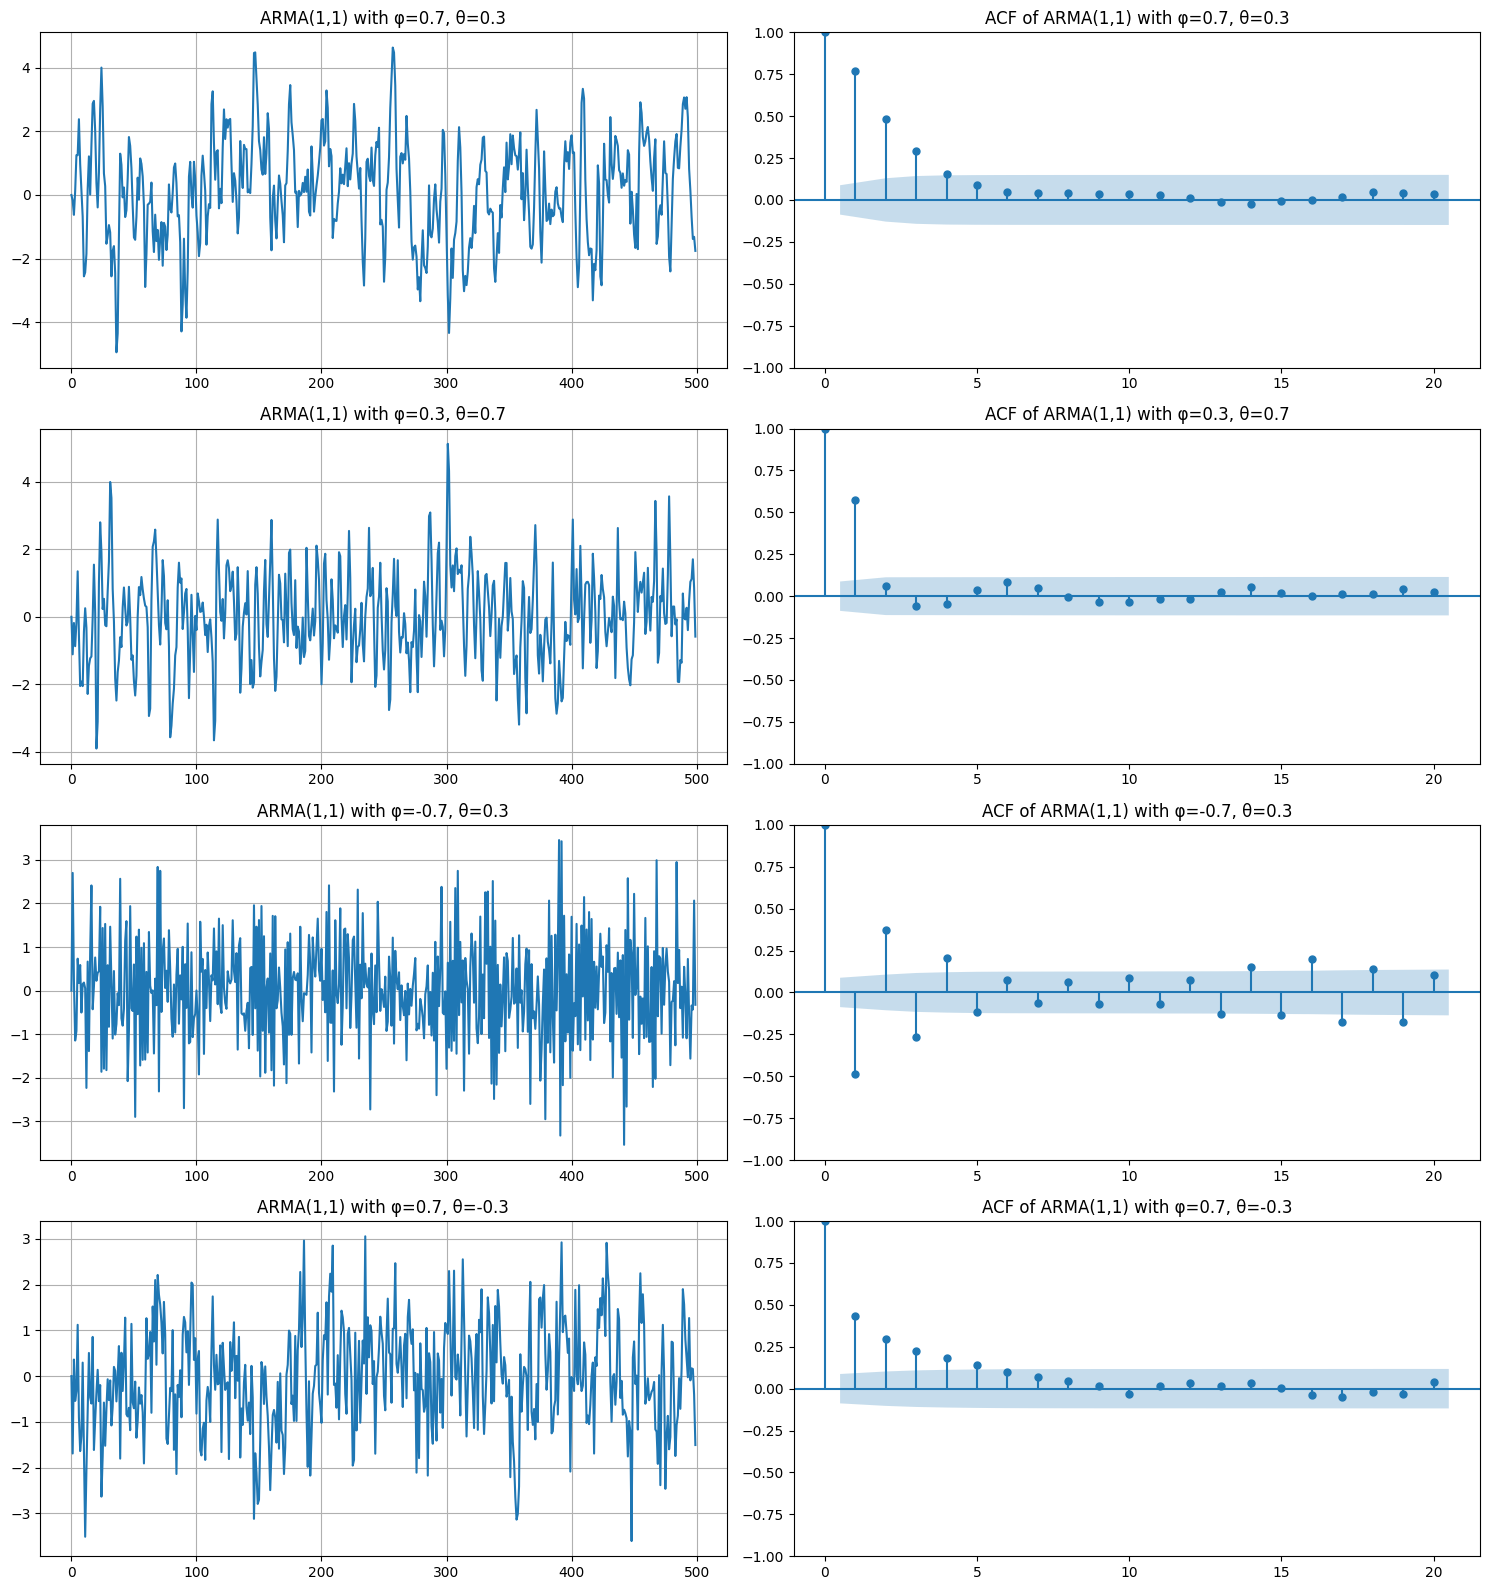


Visualizing the parameter space...


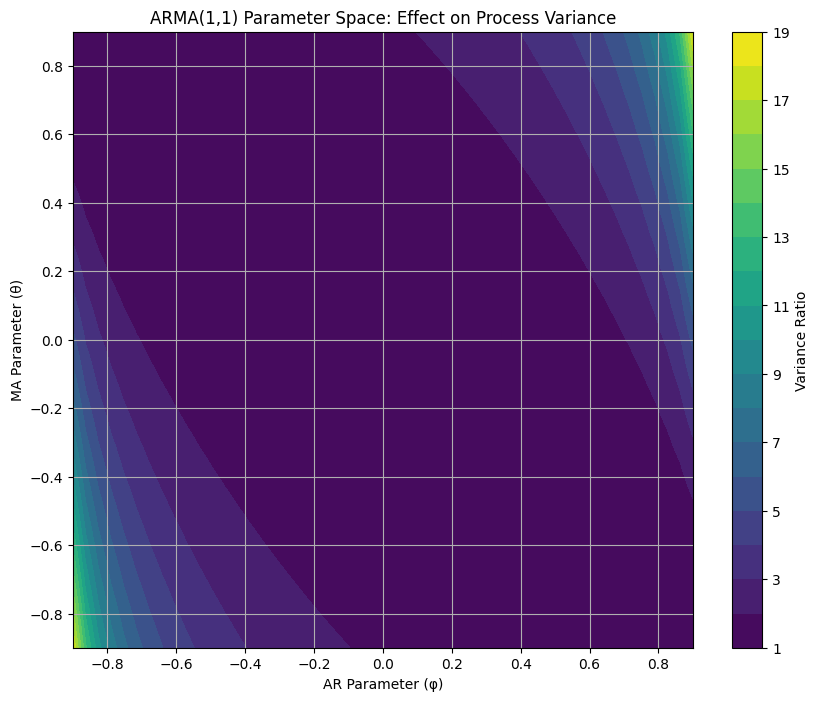


Demonstrating ARMA model fitting...

ARMA Model Fitting Results:
True parameters:
AR(1) coefficient (φ): 0.7
MA(1) coefficient (θ): 0.3

Estimated parameters:
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2513      0.135     -1.863      0.062      -0.516       0.013
ar.L1          0.6932      0.029     23.981      0.000       0.637       0.750
ma.L1          0.3004      0.035      8.534      0.000       0.231       0.369
sigma2         1.0097      0.047     21.632      0.000       0.918       1.101


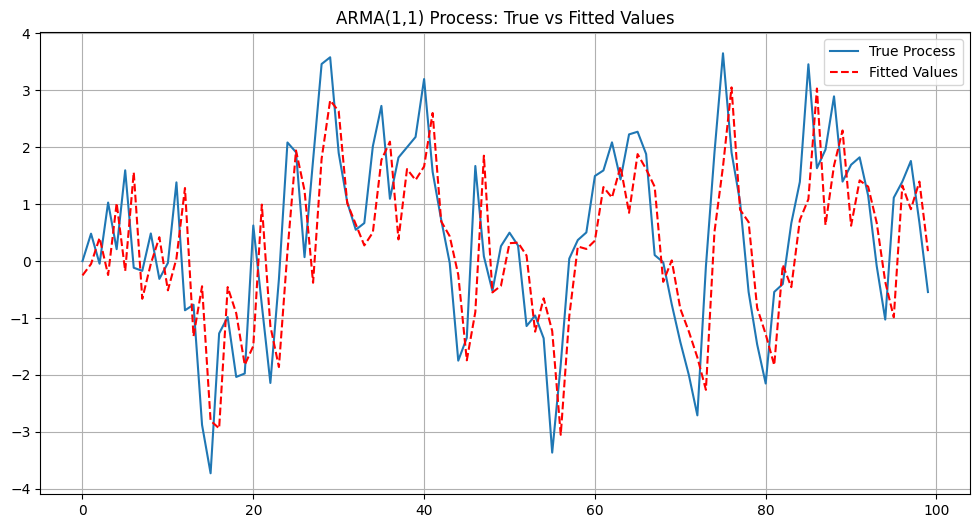

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import seaborn as sns
from scipy import stats

# Set random seed for reproducibility
np.random.seed(42)

def generate_arma11(phi, theta, n_points=1000, sigma=1.0):
    """
    Generate an ARMA(1,1) process: X_t = phi * X_{t-1} + epsilon_t + theta * epsilon_{t-1}
    
    Parameters:
    -----------
    phi : float
        The AR coefficient (-1 < phi < 1 for stationarity)
    theta : float
        The MA coefficient
    n_points : int
        Number of points to generate
    sigma : float
        Standard deviation of the noise term
    
    Returns:
    --------
    numpy.array
        The generated ARMA(1,1) process
    """
    # Initialize arrays
    x = np.zeros(n_points)
    epsilon = np.random.normal(0, sigma, n_points + 1)  # Extra point for MA term
    
    # Generate ARMA(1,1) process
    for t in range(1, n_points):
        x[t] = phi * x[t-1] + epsilon[t] + theta * epsilon[t-1]
    
    return x

def plot_process_comparison(n_points=500):
    """
    Generate and plot AR(1), MA(1), and ARMA(1,1) processes for comparison
    """
    # Generate processes
    ar_process = generate_arma11(0.7, 0, n_points)  # Pure AR(1)
    ma_process = generate_arma11(0, 0.7, n_points)  # Pure MA(1)
    arma_process = generate_arma11(0.7, 0.7, n_points)  # ARMA(1,1)
    
    # Create comparison plot
    fig, axes = plt.subplots(3, 2, figsize=(15, 12))
    
    # Plot time series
    axes[0, 0].plot(ar_process)
    axes[0, 0].set_title('AR(1) Process (φ=0.7, θ=0)')
    axes[0, 0].grid(True)
    
    axes[1, 0].plot(ma_process)
    axes[1, 0].set_title('MA(1) Process (φ=0, θ=0.7)')
    axes[1, 0].grid(True)
    
    axes[2, 0].plot(arma_process)
    axes[2, 0].set_title('ARMA(1,1) Process (φ=0.7, θ=0.7)')
    axes[2, 0].grid(True)
    
    # Plot ACF
    plot_acf(ar_process, lags=20, ax=axes[0, 1], title='AR(1) ACF')
    plot_acf(ma_process, lags=20, ax=axes[1, 1], title='MA(1) ACF')
    plot_acf(arma_process, lags=20, ax=axes[2, 1], title='ARMA(1,1) ACF')
    
    plt.tight_layout()
    plt.show()

def analyze_arma_parameters():
    """
    Analyze how different combinations of AR and MA parameters affect the process
    """
    # Generate processes with different parameter combinations
    params = [(0.7, 0.3), (0.3, 0.7), (-0.7, 0.3), (0.7, -0.3)]
    n_points = 500
    
    fig, axes = plt.subplots(len(params), 2, figsize=(15, 4*len(params)))
    
    for i, (phi, theta) in enumerate(params):
        process = generate_arma11(phi, theta, n_points)
        
        # Plot time series
        axes[i, 0].plot(process)
        axes[i, 0].set_title(f'ARMA(1,1) with φ={phi}, θ={theta}')
        axes[i, 0].grid(True)
        
        # Plot ACF
        plot_acf(process, lags=20, ax=axes[i, 1], 
                title=f'ACF of ARMA(1,1) with φ={phi}, θ={theta}')
    
    plt.tight_layout()
    plt.show()

def plot_parameter_space():
    """
    Visualize how different parameter combinations affect process characteristics
    """
    # Create grid of parameter values
    phi_vals = np.linspace(-0.9, 0.9, 50)
    theta_vals = np.linspace(-0.9, 0.9, 50)
    phi_grid, theta_grid = np.meshgrid(phi_vals, theta_vals)
    
    # Calculate process characteristics for each parameter combination
    variance_ratio = np.zeros_like(phi_grid)
    for i in range(len(phi_vals)):
        for j in range(len(theta_vals)):
            phi, theta = phi_grid[i,j], theta_grid[i,j]
            # Calculate theoretical variance ratio (var(x_t)/var(epsilon_t))
            variance_ratio[i,j] = (1 + theta**2 + 2*phi*theta) / (1 - phi**2)
    
    # Plot parameter space
    plt.figure(figsize=(10, 8))
    contour = plt.contourf(phi_grid, theta_grid, variance_ratio, levels=20)
    plt.colorbar(contour, label='Variance Ratio')
    plt.xlabel('AR Parameter (φ)')
    plt.ylabel('MA Parameter (θ)')
    plt.title('ARMA(1,1) Parameter Space: Effect on Process Variance')
    plt.grid(True)
    plt.show()

# Run the analyses
print("Comparing AR, MA, and ARMA processes...")
plot_process_comparison()

print("\nAnalyzing different ARMA parameter combinations...")
analyze_arma_parameters()

print("\nVisualizing the parameter space...")
plot_parameter_space()

# Demonstrate model fitting
def fit_arma_model():
    """
    Generate data and demonstrate ARMA model fitting
    """
    # Generate true ARMA(1,1) process
    true_phi, true_theta = 0.7, 0.3
    n_points = 1000
    true_process = generate_arma11(true_phi, true_theta, n_points)
    
    # Fit ARMA model
    model = ARIMA(true_process, order=(1, 0, 1))
    results = model.fit()
    
    # Print results
    print("\nARMA Model Fitting Results:")
    print("True parameters:")
    print(f"AR(1) coefficient (φ): {true_phi}")
    print(f"MA(1) coefficient (θ): {true_theta}")
    print("\nEstimated parameters:")
    print(results.summary().tables[1])
    
    # Plot original vs fitted
    plt.figure(figsize=(12, 6))
    plt.plot(true_process[:100], label='True Process')
    plt.plot(results.fittedvalues[:100], 'r--', label='Fitted Values')
    plt.title('ARMA(1,1) Process: True vs Fitted Values')
    plt.legend()
    plt.grid(True)
    plt.show()

# Demonstrate model fitting
print("\nDemonstrating ARMA model fitting...")
fit_arma_model()